In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
import seaborn as sns
from sklearn.model_selection import train_test_split as splt

In [ ]:
%matplotlib notebook

In [ ]:
import matplotlib.animation as anim

  #  Linear Reg using Gradient Descent

In [8]:

url = "N.csv"
df = pd.read_csv(url)
da = df.head(50)


In [9]:
def comp_cost(in_var,out_var,par):
######FOR COMPUTING COST FUNCTION######
    m=len(in_var)
    it=0
    cost_sum=0.0
    for x,y in zip(in_var,out_var):
        h = np.dot(par,np.array([1,x]))
        cost_sum+=(h-y)**2
 
    cost=cost_sum/2*m

    return cost


def grad(in_var,out_var,par,alpha,max_it): 
########VECTORIZE IMPLEMENTATION OF Gradient Descent##############
    m=len(in_var) 
    it = 0
    cost_store = np.zeros(max_it)
    X = np.array([np.ones(m),in_var])
    i_store = np.zeros(max_it)
    for i in range(max_it):
        h = np.dot(par,X)
        gradient = np.dot((h - out_var),np.transpose(X)) 
        par = par - (alpha/m)*gradient
        cost_store[i] = comp_cost(in_var,out_var,par)
        i_store[i] = i
#     ax1.clear()
    plt.plot(i_store,cost_store)  
    plt.show()
    return par,cost_store,i_store


        

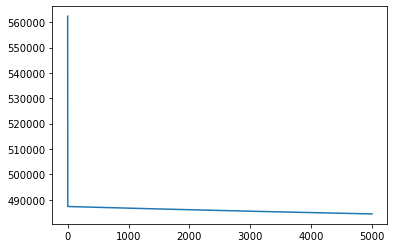

In [10]:
mit = 5000
ts = np.zeros(mit)
ist = np.zeros(mit)
thetaC = np.array([0,0])
a = 0.001
theta,ts,ist= grad(da.BMXBMI.dropna(),da.RIDAGEYR.dropna(),thetaC,a,mit)

In [6]:
cost = ts


array([562336.35652882, 489174.53322177, 487367.41983097, ...,
       476352.35532427, 476352.31810904, 476352.28089596])

In [ ]:


# fig = plt.figure()
# ax1 = fig.add_subplot(1,1,1)
def animator(i):
#     X.append(ist)
#     Y.append(ts)
    plt.cla()
    plt.plot(ist,ts)

    
        
    
a = anim.FuncAnimation(plt.gcf(),animator,interval=10)   
plt.show()

In [ ]:
def cost(par):
    m=len(da.BMXBMI.dropna())
    h = np.dot(par,np.array([np.ones(m),da.BMXBMI.dropna()]))
    cost = ((h-da.RIDAGEYR.dropna())**2)/(2*m)
    return cost

<AxesSubplot:>

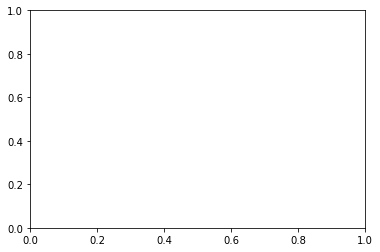

In [18]:
fig,ax= plt.subplots(nrows=1,ncols=1)
ax

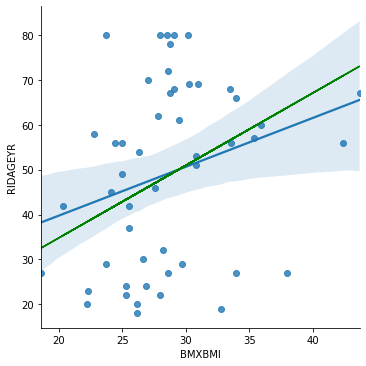

In [20]:
# plt.scatter(da.BMXBMI,da.RIDAGEYR)

correct_theta = [17.96566853,  1.08891757] #iteration=500000

sns.lmplot(x='BMXBMI', y='RIDAGEYR', data=da,fit_reg=True)
plt.plot(da.BMXBMI,theta[0] + theta[1]*da.BMXBMI,'g')
# plt.plot(da.BMXBMI,correct_theta[0] + correct_theta[1]*da.BMXBMI,'r')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression as logreg
from sklearn.model_selection import train_test_split as splt
from sklearn.metrics import classification_report as report

In [ ]:
lg = logreg()
lg.fit(da.BMXBMI.dropna().values.reshape(-1,1),da.RIDAGEYR.dropna().values.reshape(-1,1))

In [ ]:
# help(lg)

In [1]:
# [17.96566853,  1.08891757]
print(lg.coef_)
print(lg.intercept_)

NameError: name 'lg' is not defined

In [ ]:
y = lg.predict(da.BMXBMI.dropna().values.reshape(-1,1))


In [ ]:
sns.lmplot(x='BMXBMI', y='RIDAGEYR', data=da,fit_reg=False)
plt.plot(da.BMXBMI,y,'g')